# Load from folders containing jpgs in Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet50 import ResNet50
from keras import backend as K 

In [ ]:
folder_benign_train = '/content/drive/MyDrive/Colab Notebooks/8008 data/train/train/benign/'
folder_malignant_train = '/content/drive/MyDrive/Colab Notebooks/8008 data/train/train/malignant/'

folder_benign_test = '../content/drive/MyDrive/Colab Notebooks/8008 data/test/test/benign/'
folder_malignant_test = '../content/drive/MyDrive/Colab Notebooks/8008 data/test/test/malignant/'

In [ ]:
folder_benign_train = '/content/drive/MyDrive/AN8008 Team 3/train/benign/'
folder_malignant_train = '/content/drive/MyDrive/AN8008 Team 3/train/malignant/'

folder_benign_test = '../content/drive/MyDrive/AN8008 Team 3/test/benign/'
folder_malignant_test = '../content/drive/MyDrive/AN8008 Team 3/test/malignant/'

In [ ]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

In [ ]:
# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [ ]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [ ]:
# Merge data 
train_images = np.concatenate((X_benign, X_malignant), axis = 0)
train_labels = np.concatenate((y_benign, y_malignant), axis = 0)

test_images = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
test_labels= np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [ ]:
train_images.shape

(2637, 224, 224, 3)

In [ ]:
test_images.shape

(660, 224, 224, 3)

In [ ]:
len(train_labels)

2637

In [ ]:
len(test_labels)

660

In [ ]:
# Serialize numpy array into a pickle file

f1_save = open('train_images_numpy_serialized', 'wb')
pkl.dump(train_images, f1_save)
f1_save.close()

f2_save = open('test_images_numpy_serialized', 'wb')
pkl.dump(test_images, f2_save)
f2_save.close()

f3_save = open('train_labels_numpy_serialized', 'wb')
pkl.dump(train_labels, f3_save)
f3_save.close()

f4_save = open('test_labels_numpy_serialized', 'wb')
pkl.dump(test_labels, f4_save)
f4_save.close()

# Load data from pickle files in Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet50 import ResNet50
from keras import backend as K 

In [3]:
# Load serialized numpy array from pickle file

f1_load = open('/content/drive/MyDrive/AN8008 Team 3/train_images_numpy_serialized', 'rb')
train_images_loaded = pkl.load(f1_load)
f1_load.close()

f2_load = open('/content/drive/MyDrive/AN8008 Team 3/test_images_numpy_serialized', 'rb')
test_images_loaded = pkl.load(f2_load)
f2_load.close()

f3_load = open('/content/drive/MyDrive/AN8008 Team 3/train_labels_numpy_serialized', 'rb')
train_labels_loaded = pkl.load(f3_load)
f3_load.close()

f4_load = open('/content/drive/MyDrive/AN8008 Team 3/test_labels_numpy_serialized', 'rb')
test_labels_loaded = pkl.load(f4_load)
f4_load.close()

In [4]:
train_images_loaded.shape

(2637, 224, 224, 3)

In [5]:
test_images_loaded.shape

(660, 224, 224, 3)

In [6]:
len(train_labels_loaded)

2637

In [7]:
len(test_labels_loaded)

660

In [8]:
train_images = train_images_loaded
test_images = test_images_loaded
train_labels = train_labels_loaded
test_labels = test_labels_loaded

In [9]:
train_images[0,:,:,0]

array([[219, 219, 217, ..., 222, 220, 216],
       [220, 220, 218, ..., 222, 220, 216],
       [218, 220, 219, ..., 218, 217, 217],
       ...,
       [200, 198, 196, ..., 195, 192, 194],
       [198, 195, 194, ..., 193, 195, 195],
       [196, 195, 192, ..., 194, 193, 191]], dtype=uint8)

In [10]:
train_images[0,:,:,1]

array([[135, 135, 135, ..., 137, 134, 134],
       [136, 136, 134, ..., 137, 134, 134],
       [137, 139, 136, ..., 134, 133, 133],
       ...,
       [129, 127, 127, ..., 116, 118, 121],
       [127, 124, 124, ..., 119, 118, 119],
       [125, 124, 121, ..., 120, 119, 118]], dtype=uint8)

In [11]:
train_images[0,:,:,2]

array([[158, 159, 158, ..., 160, 159, 157],
       [159, 160, 160, ..., 160, 159, 157],
       [156, 158, 156, ..., 158, 156, 156],
       ...,
       [135, 135, 130, ..., 135, 133, 130],
       [135, 130, 132, ..., 136, 136, 132],
       [129, 130, 127, ..., 137, 136, 138]], dtype=uint8)

In [12]:
train_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [13]:
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

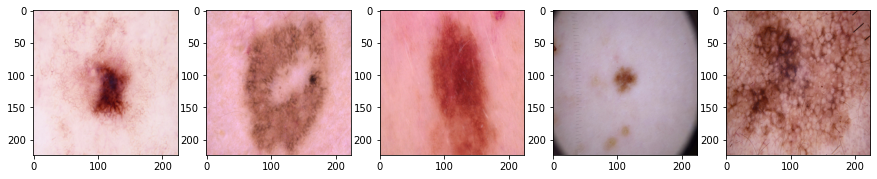

In [14]:
f, axarr = plt.subplots(1,5)
f.set_size_inches(15,15)

for i in range(5):
    img = train_images[1436:][i]
    axarr[i].imshow(img)
plt.show()

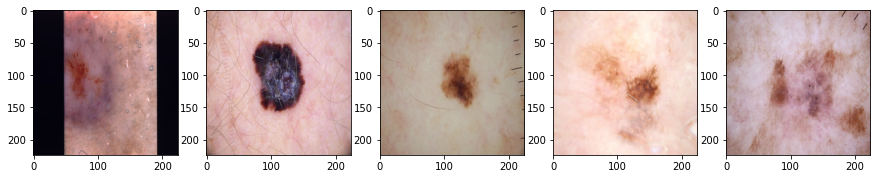

In [15]:
f, axarr = plt.subplots(1,5)
f.set_size_inches(15,15)

for i in range(5):
    img = train_images[1441:][i]
    axarr[i].imshow(img)
plt.show()

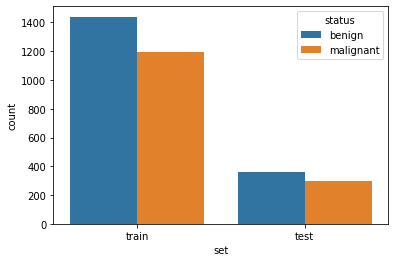

In [16]:
import seaborn as sns

data = {"count": [1440,1197,360,300],"set": ["train","train","test","test"],"status": ["benign","malignant","benign","malignant"]}
df = pd.DataFrame(data)
sns.barplot(x = "set",y = "count",hue = "status",data = df)

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [18]:
train_images[0,:,:,0]

array([[0.85882353, 0.85882353, 0.85098039, ..., 0.87058824, 0.8627451 ,
        0.84705882],
       [0.8627451 , 0.8627451 , 0.85490196, ..., 0.87058824, 0.8627451 ,
        0.84705882],
       [0.85490196, 0.8627451 , 0.85882353, ..., 0.85490196, 0.85098039,
        0.85098039],
       ...,
       [0.78431373, 0.77647059, 0.76862745, ..., 0.76470588, 0.75294118,
        0.76078431],
       [0.77647059, 0.76470588, 0.76078431, ..., 0.75686275, 0.76470588,
        0.76470588],
       [0.76862745, 0.76470588, 0.75294118, ..., 0.76078431, 0.75686275,
        0.74901961]])

In [19]:
train_images[0,:,:,1]

array([[0.52941176, 0.52941176, 0.52941176, ..., 0.5372549 , 0.5254902 ,
        0.5254902 ],
       [0.53333333, 0.53333333, 0.5254902 , ..., 0.5372549 , 0.5254902 ,
        0.5254902 ],
       [0.5372549 , 0.54509804, 0.53333333, ..., 0.5254902 , 0.52156863,
        0.52156863],
       ...,
       [0.50588235, 0.49803922, 0.49803922, ..., 0.45490196, 0.4627451 ,
        0.4745098 ],
       [0.49803922, 0.48627451, 0.48627451, ..., 0.46666667, 0.4627451 ,
        0.46666667],
       [0.49019608, 0.48627451, 0.4745098 , ..., 0.47058824, 0.46666667,
        0.4627451 ]])

In [20]:
train_images[0,:,:,2]

array([[0.61960784, 0.62352941, 0.61960784, ..., 0.62745098, 0.62352941,
        0.61568627],
       [0.62352941, 0.62745098, 0.62745098, ..., 0.62745098, 0.62352941,
        0.61568627],
       [0.61176471, 0.61960784, 0.61176471, ..., 0.61960784, 0.61176471,
        0.61176471],
       ...,
       [0.52941176, 0.52941176, 0.50980392, ..., 0.52941176, 0.52156863,
        0.50980392],
       [0.52941176, 0.50980392, 0.51764706, ..., 0.53333333, 0.53333333,
        0.51764706],
       [0.50588235, 0.50980392, 0.49803922, ..., 0.5372549 , 0.53333333,
        0.54117647]])

In [ ]:
# train_images = tf.keras.utils.normalize(train_images, axis=1)
# test_images  = tf.keras.utils.normalize(test_images, axis=1)

# Model building trial

In [21]:
model = tf.keras.models.Sequential()

In [22]:
# Add layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

In [23]:
# Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

In [24]:
# Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [25]:
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=128, shuffle=True, epochs=25)

Epoch 1/25
21/21 [==============================] - 23s 608ms/step - loss: 2.6561 - accuracy: 0.4571
Epoch 2/25
21/21 [==============================] - 11s 507ms/step - loss: 0.5714 - accuracy: 0.7200
Epoch 3/25
21/21 [==============================] - 11s 509ms/step - loss: 0.4768 - accuracy: 0.7656
Epoch 4/25
21/21 [==============================] - 11s 512ms/step - loss: 0.4972 - accuracy: 0.7460
Epoch 5/25
21/21 [==============================] - 11s 515ms/step - loss: 0.4842 - accuracy: 0.7528
Epoch 6/25
21/21 [==============================] - 11s 517ms/step - loss: 0.4022 - accuracy: 0.8053
Epoch 7/25
21/21 [==============================] - 11s 519ms/step - loss: 0.3758 - accuracy: 0.8088
Epoch 8/25
21/21 [==============================] - 11s 521ms/step - loss: 0.3791 - accuracy: 0.8072
Epoch 9/25
21/21 [==============================] - 11s 526ms/step - loss: 0.3594 - accuracy: 0.8252
Epoch 10/25
21/21 [==============================] - 11s 525ms/step - loss: 0.3634 - accura

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

21/21 - 2s - loss: 0.4667 - accuracy: 0.8348

Test accuracy: 0.8348484635353088
